In [19]:
from random import sample
import pandas as pd
from time import time
from matplotlib import pyplot as plt

In [20]:
def BubbleSort(lista, show_output=True):
  before = time()
  comparacoes = 0
  trocas = 0
  for k in range(1, len(lista)):
    troca = False
    for j in range(len(lista) -k):
      if (lista[j] > lista[j+1]):
        trocas += 1
        lista[j], lista[j+1] = lista[j+1], lista[j]
        troca = True
      comparacoes += 1
    if (troca == False):
      break
  after = time()
  if show_output:
    print(f"Tempo para ordenar {after - before}\nComparacoes {comparacoes}\nTrocas {trocas}\nLista de saida -> {lista}")
  return len(lista), comparacoes, trocas, after - before

In [21]:
def quickSort(lista, show_output=True):
  before = time()
  comparacoes = 0
  trocas = 0
  comparacoes, trocas = quickSortModulo(lista, 0,len(lista)-1, comparacoes, trocas)
  after = time()
  if show_output:
    print(f"Tempo para ordenar {after - before}\nComparacoes {comparacoes}\nTrocas {trocas}\nLista de saida -> {lista}")
  return len(lista), comparacoes, trocas, after - before

def quickSortModulo(lista, primeiro, ultimo, comparacoes, trocas):
  if primeiro<ultimo:
    indice_pivo, comparacoes, trocas = partition(lista, primeiro, ultimo, comparacoes, trocas)
    comparacoes, trocas = quickSortModulo(lista, primeiro, indice_pivo-1, comparacoes, trocas)
    comparacoes, trocas = quickSortModulo(lista, indice_pivo+1, ultimo, comparacoes, trocas)
  return comparacoes, trocas

def partition(lista, primeiro, ultimo, comparacoes, trocas):
  pivo = lista[primeiro]
  esquerda = primeiro+1
  direita = ultimo
  while esquerda <= direita:
    while (esquerda <= direita and lista[esquerda] <= pivo):
      esquerda = esquerda + 1
      comparacoes +=1

    while (lista[direita] >= pivo and direita >= esquerda):
      direita = direita -1
      comparacoes +=1

    if (direita > esquerda):
      lista[esquerda], lista[direita] = lista[direita], lista[esquerda]
      trocas += 1
      comparacoes +=1

  lista[primeiro], lista[direita] = lista[direita], lista[primeiro]
  trocas += 1
  return direita, comparacoes, trocas

In [22]:
def conta_elementos(lista):
  maior_valor = 0
  comparacoes = 0
  for k in lista:
    if (maior_valor < k):
      maior_valor = k
    comparacoes += 1

  lista_contagem = [0 for k in range(maior_valor + 1)]
  for k in lista:
    lista_contagem[k] += 1
  for i in range(1, maior_valor + 1):
    lista_contagem[i] += lista_contagem[i-1]
  return lista_contagem, comparacoes

def counting_sort(lista, show_output=True):
  before = time()
  lista_contagem, comparacoes = conta_elementos(lista)
  trocas = 0
  saida_organizada = [0 for k in range(len(lista))]
  indice = len(lista) - 1
  while indice >= 0:
      elemento_atual = lista[indice]
      lista_contagem[elemento_atual] -= 1
      posicao = lista_contagem[elemento_atual]
      saida_organizada[posicao] = elemento_atual
      indice -= 1
      trocas += 1
  after = time()
  if show_output:
    print(f"Tempo para ordenar {after - before}\nComparacoes {comparacoes}\nTrocas {trocas}\nLista de saida -> {saida_organizada}")
  return len(lista), comparacoes, trocas, after - before

In [23]:
dez = sample(range(200_000, 1, -2),  10)
cem = sample(range(1, 200_000),  100)
mil = sample(range(1, 200_000),  1_000)
dezmil = sample(range(1, 200_000),  10_000)
cemmil = sample(range(1, 200_000),  100_000)

In [24]:
def ordernar():
  x = 1
  while x > 0:
    try:
      x = int(input("Digite:\n1. BubbleSort.\n2. QuickSort\n3. CountingSort\n0. Sair\nEscolha: "))
      if (x == 0):
        break
      y = int(input("Digite:\n1. Vetor com 10 elementos\n2. Vetor com 100 elementos\n3. Vetor com 1.000 elementos\n4. Vetor com 10.000 elementos\n5. Vetor com 100.000 elementos\nEscolha: "))
      if (x == 1):
        if (y == 1):
          BubbleSort(dez)
        elif (y == 2):
          BubbleSort(cem)
        elif (y == 3):
          BubbleSort(mil)
        elif (y == 4):
          BubbleSort(dezmil)
        elif (y == 5):
          BubbleSort(cemmil)
      elif (x == 2):
        if (y == 1):
          quickSort(dez)
        elif (y == 2):
          quickSort(cem)
        elif (y == 3):
          quickSort(mil)
        elif (y == 4):
          quickSort(dezmil)
        elif (y == 5):
          quickSort(cemmil)
      if (x == 3):
        if (y == 1):
          counting_sort(dez)
        elif (y == 2):
          counting_sort(cem)
        elif (y == 3):
          counting_sort(mil)
        elif (y == 4):
          counting_sort(dezmil)
        elif (y == 5):
          counting_sort(cemmil)
    except TypeError:
      ordernar()

In [25]:
def dados_bub():
  dados = []
  dados.append(BubbleSort(dez, show_output=False))
  dados.append(BubbleSort(cem, show_output=False))
  dados.append(BubbleSort(mil, show_output=False))
  dados.append(BubbleSort(dezmil, show_output=False))
  dados.append(BubbleSort(cemmil, show_output=False))
  return dados

In [26]:
def dados_quick():
  dados = []
  dados.append(quickSort(dez, show_output=False))
  dados.append(quickSort(cem, show_output=False))
  dados.append(quickSort(mil, show_output=False))
  dados.append(quickSort(dezmil, show_output=False))
  dados.append(quickSort(cemmil, show_output=False))
  return dados

In [27]:
def dados_count():
  dados = []
  dados.append(counting_sort(dez, show_output=False))
  dados.append(counting_sort(cem, show_output=False))
  dados.append(counting_sort(mil, show_output=False))
  dados.append(counting_sort(dezmil, show_output=False))
  dados.append(counting_sort(cemmil, show_output=False))
  return dados

In [28]:
def grafico(dados, title):
  df = pd.DataFrame(dados, columns=["Tamanho", "Comparações", "Trocas", "Tempo (s)"])
  grafi, axes = plt.subplots(nrows = 1, ncols=3, figsize=(20, 8))
  
  axes[0].plot(df["Tamanho"], df["Comparações"], color='red', linestyle='solid', markerfacecolor='blue', markersize=5) #, marker='o' - criar pontos
  axes.flat[0].set(xlabel='Tamanho', ylabel='Comparações')
  axes[0].set_ylim([df["Comparações"].min(), df["Comparações"].max() * 1.3])
  
  axes[1].plot(df["Tamanho"], df["Trocas"], color='red', linestyle='solid', markerfacecolor='blue', markersize=5)
  axes.flat[1].set(xlabel='Tamanho', ylabel='Trocas')
  axes[1].set_ylim([df["Trocas"].min(), df["Trocas"].max() * 1.3])

  axes[2].plot(df["Tamanho"], df["Tempo (s)"], color='red', linestyle='solid', markerfacecolor='blue', markersize=5)
  axes.flat[2].set(xlabel='Tamanho', ylabel='Tempo (s)')
  axes[2].set_ylim([df["Tempo (s)"].min(), df["Tempo (s)"].max() * 1.3])

  for ax in axes:
    ax.axhline(color="black")
    ax.axvline(color="black")
  grafi.suptitle(title)
  grafi.tight_layout()
  plt.show()

In [29]:
def dados_quic_0_100k():
  dados_quickSort = []
  for k in range(0, 100_001, 1_000):
    dados_quickSort.append(quickSort(sample(range(1, 200_000), k), show_output=False))
  return dados_quickSort

In [30]:
def dados_count_0_100k():
  dados_count = []
  for k in range(0,100_001, 1_000):
    dados_count.append(counting_sort(sample(range(1, 200_000), k), show_output=False))
  return dados_count

In [31]:
def dados_bub_0_35k():
  dados_bub = []
  for k in range(0,35_001, 1_000):
    dados_bub.append(BubbleSort(sample(range(1, 200_000), k), show_output=False))
  return dados_bub

In [32]:
def sai_graphics():
  (grafico(pd.DataFrame(dados_quic_0_100k(),columns=["Tamanho", "Comparações", "Trocas", "Tempo (s)"]), "QuickSort"))
  (grafico(pd.DataFrame(dados_count_0_100k(),columns=["Tamanho", "Comparações", "Trocas", "Tempo (s)"]), "CountingSort"))
  (grafico(pd.DataFrame(dados_bub_0_35k(),columns=["Tamanho", "Comparações", "Trocas", "Tempo (s)"]), "BubbleSort"))

In [33]:
def menu():
  x = 1
  while x > 0:
    x = int(input("Escolha:\n1. Mostrar os vetores de entrada.\n2. Ordenar vetor\n3. Exibir os Graficos -> Array Gerado aleatoriamente\n0. Sair\nResposta: "))
    if (x == 1):
      print(f"{dez}\n\n{cem}\n\n{mil}\n\n{dezmil}\n\n{cemmil}")
    elif (x == 2):
      ordernar()
    elif (x == 3):
      sai_graphics()

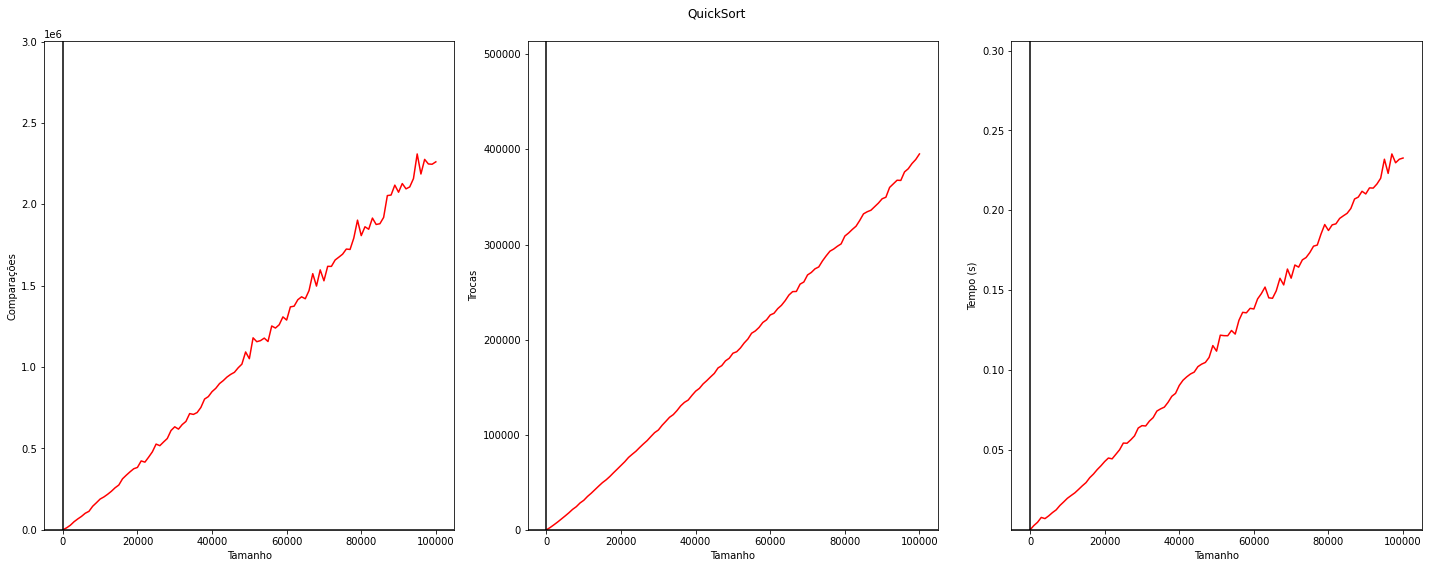

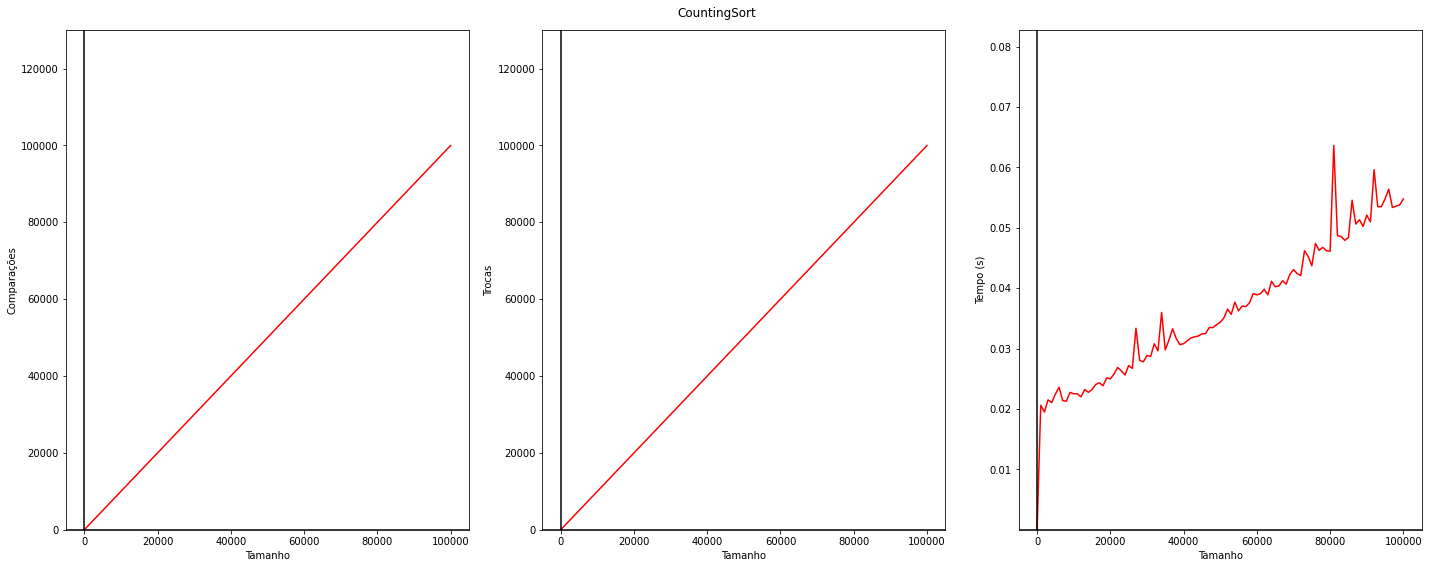

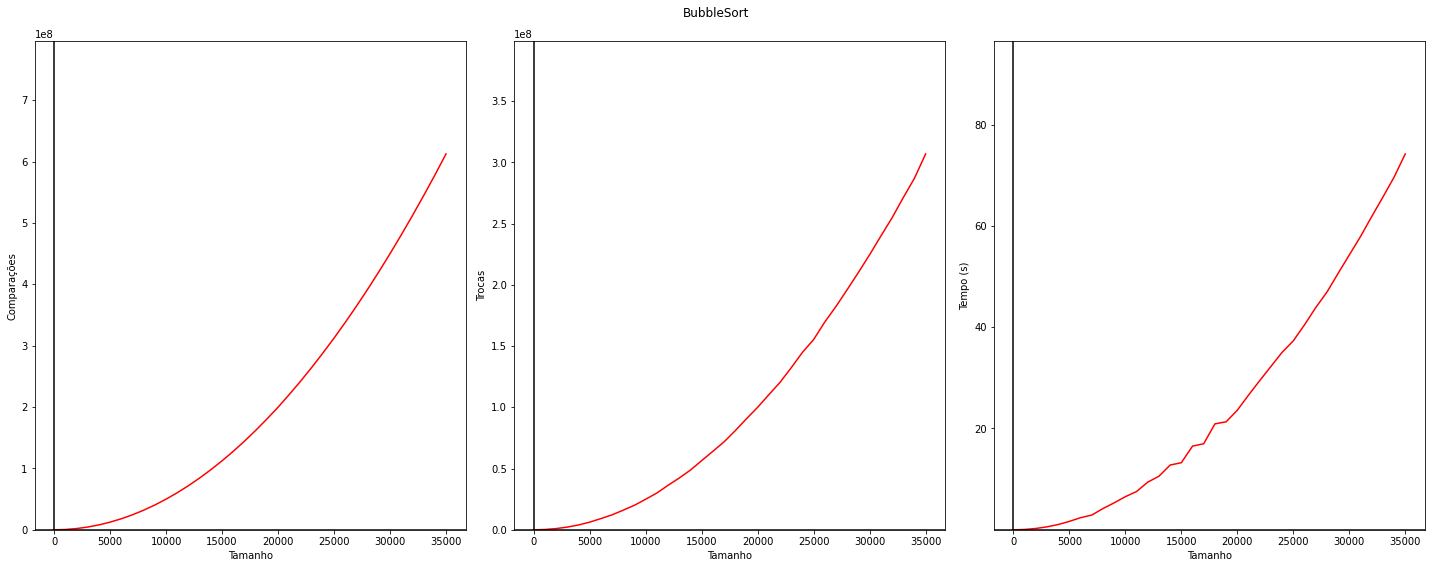

In [34]:
menu()